In [71]:
import numpy as np
import pandas as pd
import scipy as sc
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
import sklearn as sk

class DimReductionEvaluation:
    def __init__(self, data=None):
        # data in the form of a pandas dataframe with the following columns:
        #     - image: the image file
        #     - label: the label of the image
        self.data = data
        
    def get_data_from_folder(self, folder_path, image_sise):
        # specify the shape of the resized image
        shape = (image_sise, image_sise)  

        self.image_size = image_sise
        self.image_shape = shape
        # Create an empty dictionary to store the data
        data = {'image': [], 'label': [], 'numpy_image': []}

        # loop through each category folder
        for category in os.listdir(folder_path):
            category_path = os.path.join(folder_path, category)
            if os.path.isdir(category_path):
                # loop through each image file in the category folder
                for file in os.listdir(category_path):
                    file_path = os.path.join(category_path, file)
                    if os.path.isfile(file_path):
                        # open the image file and resize it
                        with Image.open(file_path) as image:
                            label = category
                            # Add the image and label to the dictionary
                            data['image'].append(image)
                            data['label'].append(label)
                            data['numpy_image'].append(np.array(image.resize(shape)).reshape(-1)/255)
        # Convert the dictionary to a pandas dataframe
        self.data = pd.DataFrame(data)
        

In [38]:

# Set the path to the folder containing the image data
data_path = '../dataset/input_resized/flowers/'

# Create an instance of the DimReductionEvaluation class
dre = DimReductionEvaluation()
dre.get_data_from_folder(data_path, 256)

In [72]:
# Range of K values to test
k_range=np.linspace(10, 800, 20).astype(np.int64)

# Number of samples to use
N=300

error_RP=[]
error_SRP=[]
sample=np.array([np.array(x).mean(axis=-1).reshape(-1)\
                  for x in dre.data.sample(2*N)['image']])

sk.preprocessing.normalize(sample, axis=1, norm='l2', copy=False)

x1=sample[:N]
x2=sample[N:]
for k in k_range:
    # Linear Projection for the currnet k
    # RP=lambda x: RP_k(x, k)
    RP_=GaussianRandomProjection(n_components=k)
    RP_.fit(x1)
    RP=RP_.transform
    SRP_=SparseRandomProjection(n_components=k)
    SRP_.fit(x1)
    SRP=SRP_.transform
    
    # Calculate the reconstruction error
    d=np.linalg.norm(x1-x2, axis=1)
    d_RP=np.linalg.norm(RP(x1)-RP(x2), axis=1)*np.sqrt(x1.shape[1]/k)
    d_SRP=np.linalg.norm(SRP(x1)-SRP(x2), axis=1)*np.sqrt(x1.shape[1]/k)
    
    error_SRP.append((d-d_SRP))
    error_RP.append((d-d_RP))

    # error.append(calculate_distance_error(diff, 
    #                 RP, factor=np.sqrt(diff.shape[1]/k)).mean())
error_RP=np.array(error_RP)
error_SRP=np.array(error_SRP)



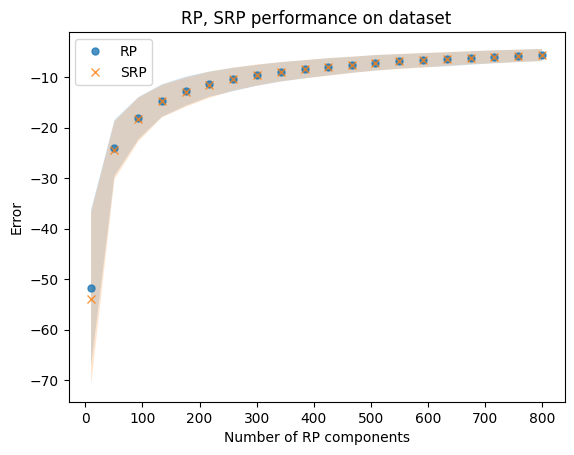

In [73]:
#Making nice plot
fig, ax = plt.subplots()
for error, plot_style, markersize, linewidth, label in zip([error_RP, error_SRP],
                             ['o', 'x'], [5, 6], [2, 10], ['RP', 'SRP']):
                             
    ax.plot(k_range, error.mean(axis=-1), plot_style, markersize=markersize,
            linewidth=linewidth, label=label, alpha=0.8)
    ax.fill_between(k_range, error.mean(axis=-1) - error.std(axis=-1),
                    error.mean(axis=-1) + error.std(axis=-1), alpha=0.2)
    
ax.legend(loc='best')
ax.set_xlabel('Number of RP components')
ax.set_ylabel('Error')
ax.set_title('RP, SRP performance on dataset')
plt.show()
# (d1-d2).mean()


In [77]:
sample.mean(axis=-1)

array([0.00333851, 0.00366817, 0.00371871, 0.00322371, 0.00350691,
       0.00356233, 0.00362924, 0.00319127, 0.00270629, 0.0029562 ,
       0.00363508, 0.00369908, 0.00356182, 0.002505  , 0.00275149,
       0.00361528, 0.00322657, 0.0035638 , 0.00375594, 0.0036314 ,
       0.00357425, 0.00334359, 0.0032713 , 0.00349128, 0.00345343,
       0.00361275, 0.00338366, 0.00353794, 0.00259134, 0.00310819,
       0.00307839, 0.00348457, 0.00356413, 0.00337093, 0.00382914,
       0.00347188, 0.00329284, 0.00358647, 0.00383994, 0.00325449,
       0.00370198, 0.00220928, 0.00369616, 0.0029381 , 0.00344228,
       0.00379783, 0.00374497, 0.00363402, 0.00336426, 0.00359176,
       0.00359347, 0.0034286 , 0.00292661, 0.00351138, 0.00364022,
       0.0033806 , 0.00295333, 0.00325929, 0.00353655, 0.00320836,
       0.00326869, 0.00356994, 0.00353921, 0.00323892, 0.00347114,
       0.00344419, 0.00329903, 0.00342496, 0.00335411, 0.00337823,
       0.00364241, 0.00289749, 0.003364  , 0.00379236, 0.00346

In [ ]:

plt.semilogy(k_range, error, 'o')

In [46]:
sample=np.array([np.array(x).mean(axis=-1).reshape(-1) for x in dre.data.sample(2*N)['image']])
print(sample[:N].shape)
print(sample[N:].shape

(100, 65536)
(100, 65536)
